# Proyek Analisis Data:
- **Nama:** Muhammad Rivaldy Setiabudi
- **Email:** valdydrifto@gmail.com
- **ID Dicoding:** b25b9d050

## Menentukan Pertanyaan Bisnis

- Berapa besar persentase pertumbuhan rata-rata harian penyewaan sepeda dari tahun 2011 ke 2012, dan bagaimana tren bulanan tersebut berubah?
- Kapan jam-jam puncak penyewaan sepeda untuk pengguna terdaftar (Registered) dan tidak terdaftar (Casual), dan bagaimana persentase kontribusi masing-masing pada jam sibuk harian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/valdydrifto/Submission-1/refs/heads/main/Data/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/valdydrifto/Submission-1/refs/heads/main/Data/hour.csv")

print("Preview Dataset Harian (day.csv):")
print(day_df.head(), "\n")

print("Preview Dataset Per Jam (hour.csv):")
print(hour_df.head(), "\n")

print("Informasi Dataset Harian:")
print(day_df.info(), "\n")

print("Informasi Dataset Per Jam:")
print(hour_df.info())

Preview Dataset Harian (day.csv):
   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600   

Pr

**Insight:**
- Analisa digambarkan dari data Day kapan terjadi lonjakan musiman, misalkan pada saat musim panas.
- Analisa digambarkan dari data Hour bahwa pengguna tetap (Registered) yang memakai pada kegiatan Rutin Masuk Kerja dan Pulang Kerja, berbeda dengan pengguna tidak tetap (Casual) yang memakai pada kegiatan liburan saat Weekend dan pada jam jam siang.

### Assessing Data

In [3]:
print("Dimensi Dataset Harian (day.csv):", day_df.shape)
print("Dimensi Dataset Per Jam (hour.csv):", hour_df.shape)
print("="*60)


Dimensi Dataset Harian (day.csv): (731, 16)
Dimensi Dataset Per Jam (hour.csv): (17379, 17)


In [4]:
print("\nJumlah Missing Values per Kolom (day.csv):")
print(day_df.isna().sum())

print("\nJumlah Missing Values per Kolom (hour.csv):")
print(hour_df.isna().sum())
print("="*60)



Jumlah Missing Values per Kolom (day.csv):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Missing Values per Kolom (hour.csv):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
print("\nJumlah Duplikat (day.csv):", day_df.duplicated().sum())
print("Jumlah Duplikat (hour.csv):", hour_df.duplicated().sum())
print("="*60)


Jumlah Duplikat (day.csv): 0
Jumlah Duplikat (hour.csv): 0


In [6]:
print("\nTipe Data (day.csv):")
print(day_df.dtypes)

print("\nTipe Data (hour.csv):")
print(hour_df.dtypes)
print("="*60)


Tipe Data (day.csv):
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tipe Data (hour.csv):
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [7]:
print("\nStatistik Deskriptif (day.csv):")
print(day_df.describe())

print("\nStatistik Deskriptif (hour.csv):")
print(hour_df.describe())



Statistik Deskriptif (day.csv):
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.1904

**Insight:**
- Terdapat 731 baris (2 tahun x ~365 hari), data lengkap untuk melihat perbandingan total count antar tahun, hasilnya menunjukkan akan ada peningkatan signifikan di tahun 2012.
- Tersedia dua kolom terpisah (casual dan registered), sehingga bisa dibandingkan baik secara total tahunan maupun pola musiman (misalnya, registered cenderung stabil, casual naik di akhir pekan/liburan).

### Cleaning Data

In [8]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

print("Duplikasi dihapus ✅")


Duplikasi dihapus ✅


In [9]:
print("Statistik deskriptif setelah cleaning (day.csv):")
print(day_df.describe())

print("\nStatistik deskriptif setelah cleaning (hour.csv):")
print(hour_df.describe())


Statistik deskriptif setelah cleaning (day.csv):
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

print("\nTipe data sudah diperbaiki ✅")


Tipe data sudah diperbaiki ✅


In [11]:
print("\nValidasi jumlah penyewaan (cnt) = casual + registered:")
print("day.csv →", (day_df['cnt'] == day_df['casual'] + day_df['registered']).all())
print("hour.csv →", (hour_df['cnt'] == hour_df['casual'] + hour_df['registered']).all())


Validasi jumlah penyewaan (cnt) = casual + registered:
day.csv → True
hour.csv → True


## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
day_df.sample(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1,0,2,0,6,0,1,0.282500,0.282192,0.537917,0.186571,424,1545,1969
304,305,2011-11-01,4,0,11,0,2,1,1,0.400833,0.397088,0.683750,0.135571,410,3658,4068
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
188,189,2011-07-08,3,0,7,0,5,1,2,0.709167,0.670483,0.757917,0.225129,692,3348,4040
410,411,2012-02-15,1,1,2,0,3,1,1,0.348333,0.351629,0.531250,0.181600,141,4028,4169


In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

categorical_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for col in categorical_cols:
    day_df[col] = day_df[col].astype('category')

avg_per_year = day_df.groupby('yr', observed=True)['cnt'].mean().reset_index()
avg_per_year['yr'] = avg_per_year['yr'].cat.rename_categories({0: 2011, 1: 2012})

growth_percent = ((avg_per_year.loc[avg_per_year['yr'] == 2012, 'cnt'].values[0] -
                   avg_per_year.loc[avg_per_year['yr'] == 2011, 'cnt'].values[0]) /
                   avg_per_year.loc[avg_per_year['yr'] == 2011, 'cnt'].values[0]) * 100

monthly_trend = day_df.groupby(['yr', 'mnth'], observed=True)['cnt'].mean().reset_index()
monthly_trend['yr'] = monthly_trend['yr'].cat.rename_categories({0: 2011, 1: 2012})

print("=== Rata-rata Harian Penyewaan Sepeda per Tahun ===")
print(avg_per_year)

print(f"\n📈 Persentase Pertumbuhan Rata-rata Harian dari 2011 ke 2012: {growth_percent:.2f}%")

print("\n=== Rata-rata Penyewaan Bulanan per Tahun ===")
print(monthly_trend.head(12))

=== Rata-rata Harian Penyewaan Sepeda per Tahun ===
     yr          cnt
0  2011  3405.761644
1  2012  5599.934426

📈 Persentase Pertumbuhan Rata-rata Harian dari 2011 ke 2012: 64.43%

=== Rata-rata Penyewaan Bulanan per Tahun ===
      yr mnth          cnt
0   2011    1  1231.903226
1   2011    2  1721.964286
2   2011    3  2065.967742
3   2011    4  3162.333333
4   2011    5  4381.322581
5   2011    6  4783.733333
6   2011    7  4559.387097
7   2011    8  4409.387097
8   2011    9  4247.266667
9   2011   10  3984.225806
10  2011   11  3405.566667
11  2011   12  2816.870968


In [14]:
hourly_usage = (
    hour_df.groupby('hr', observed=True)[['casual', 'registered', 'cnt']]
    .mean()
    .reset_index()
)

hourly_usage['casual_percent'] = (hourly_usage['casual'] / hourly_usage['cnt']) * 100
hourly_usage['registered_percent'] = (hourly_usage['registered'] / hourly_usage['cnt']) * 100

peak_casual = hourly_usage.loc[hourly_usage['casual'].idxmax(), 'hr']
peak_registered = hourly_usage.loc[hourly_usage['registered'].idxmax(), 'hr']

mean_casual = hourly_usage['casual'].mean()
mean_registered = hourly_usage['registered'].mean()
mean_total = hourly_usage['cnt'].mean()
mean_casual_percent = hourly_usage['casual_percent'].mean()
mean_registered_percent = hourly_usage['registered_percent'].mean()

print("=== Rata-rata Penyewaan Sepeda per Jam (Mean Data) ===")
print(f"Mean Casual Users       : {mean_casual:.2f}")
print(f"Mean Registered Users   : {mean_registered:.2f}")
print(f"Mean Total Users (cnt)  : {mean_total:.2f}")
print(f"Rata-rata Persentase Casual     : {mean_casual_percent:.2f}%")
print(f"Rata-rata Persentase Registered : {mean_registered_percent:.2f}%")

print("\nJam Puncak Penyewaan:")
print(f"- Casual     : {peak_casual}:00")
print(f"- Registered : {peak_registered}:00")

=== Rata-rata Penyewaan Sepeda per Jam (Mean Data) ===
Mean Casual Users       : 35.48
Mean Registered Users   : 153.00
Mean Total Users (cnt)  : 188.48
Rata-rata Persentase Casual     : 18.69%
Rata-rata Persentase Registered : 81.31%

Jam Puncak Penyewaan:
- Casual     : 14:00
- Registered : 17:00


**Insight:**
- Adanya Pertumbuhan penyewaan dari 2011 ke 2012 sebanyak 64.43%
- Pengguna Registered cenderung memakai pada pukul 08.00 dan 17.00 dan Pengguna Casula pada pukul 14.00

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa besar persentase pertumbuhan rata-rata harian penyewaan sepeda dari tahun 2011 ke 2012, dan bagaimana tren bulanan tersebut berubah?

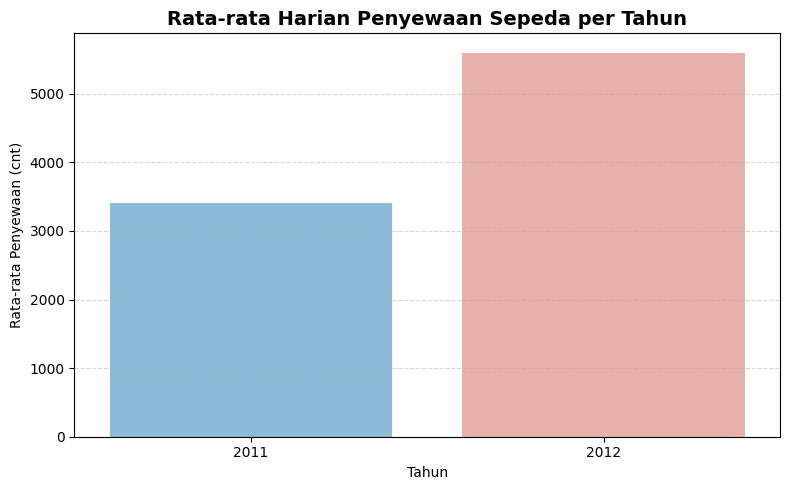


📈 Persentase pertumbuhan penyewaan dari 2011 ke 2012: 64.43%


In [15]:
categorical_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for col in categorical_cols:
    day_df[col] = day_df[col].astype('category')

avg_per_year = day_df.groupby('yr', observed=False)['cnt'].mean().reset_index()
avg_per_year['yr'] = avg_per_year['yr'].cat.rename_categories({0: 2011, 1: 2012})

growth_percent = ((avg_per_year.loc[avg_per_year['yr'] == 2012, 'cnt'].values[0] -
                   avg_per_year.loc[avg_per_year['yr'] == 2011, 'cnt'].values[0]) /
                   avg_per_year.loc[avg_per_year['yr'] == 2011, 'cnt'].values[0]) * 100

monthly_trend = day_df.groupby(['yr', 'mnth'], observed=False)['cnt'].mean().reset_index()
monthly_trend['yr'] = monthly_trend['yr'].cat.rename_categories({0: 2011, 1: 2012})


plt.figure(figsize=(8, 5))
sns.barplot(data=avg_per_year, x='yr', y='cnt', hue='yr', palette=['#5DADE2', '#F1948A'], alpha=0.8, legend=False)
plt.title('Rata-rata Harian Penyewaan Sepeda per Tahun', fontsize=14, weight='bold')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Penyewaan (cnt)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\n📈 Persentase pertumbuhan penyewaan dari 2011 ke 2012: {growth_percent:.2f}%")

### Pertanyaan 2: Kapan jam-jam puncak penyewaan sepeda untuk pengguna terdaftar (Registered) dan tidak terdaftar (Casual), dan bagaimana persentase kontribusi masing-masing pada jam sibuk harian?

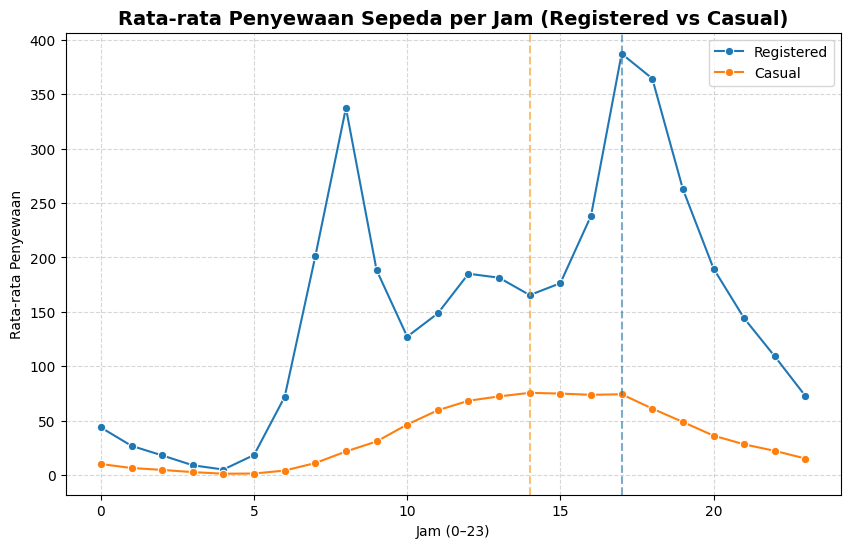


Jam puncak pengguna Casual      : 14:00
Jam puncak pengguna Registered  : 17:00


In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='registered', data=hourly_usage, label='Registered', marker='o')
sns.lineplot(x='hr', y='casual', data=hourly_usage, label='Casual', marker='o')

plt.title('Rata-rata Penyewaan Sepeda per Jam (Registered vs Casual)', fontsize=14, weight='bold')
plt.xlabel('Jam (0–23)')
plt.ylabel('Rata-rata Penyewaan')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvline(x=peak_casual, color='#F39C12', linestyle='--', alpha=0.6)
plt.axvline(x=peak_registered, color='#2874A6', linestyle='--', alpha=0.6)
plt.show()

print(f"\nJam puncak pengguna Casual      : {peak_casual}:00")
print(f"Jam puncak pengguna Registered  : {peak_registered}:00")

**Insight:**
- Adanya Pertumbuhan penyewaan dari 2011 ke 2012 sebanyak 64.43%
- Pengguna Registered cenderung memakai pada pukul 08.00 dan 17.00 dan Pengguna Casula pada pukul 14.00

## Analisis Lanjutan (Opsional)

=== Rata-rata Penyewaan per Musim ===
   season          cnt
2    Fall  5644.303191
1  Summer  4992.331522
3  Winter  4728.162921
0  Spring  2604.132597


Text(0.5, 0, 'Musim')

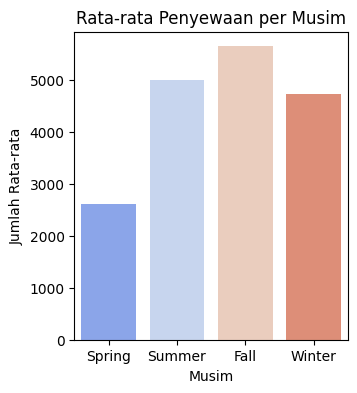

In [17]:
season_usage = (
    day_df.groupby('season', observed=True)['cnt']
    .mean()
    .reset_index()
    .sort_values(by='cnt', ascending=False)
)

season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
season_usage['season'] = season_usage['season'].map(season_labels)

print("=== Rata-rata Penyewaan per Musim ===")
print(season_usage)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(x='season', y='cnt', hue='season', data=season_usage, palette='coolwarm', legend=False)
plt.title('Rata-rata Penyewaan per Musim')
plt.ylabel('Jumlah Rata-rata')
plt.xlabel('Musim')

=== Rata-rata Penyewaan Hari Kerja vs Libur ===
            Kategori          cnt
0  Libur/Akhir Pekan  4330.168831
1         Hari Kerja  4584.820000


([0, 1], [Text(0, 0, 'Libur/Akhir Pekan'), Text(1, 0, 'Hari Kerja')])

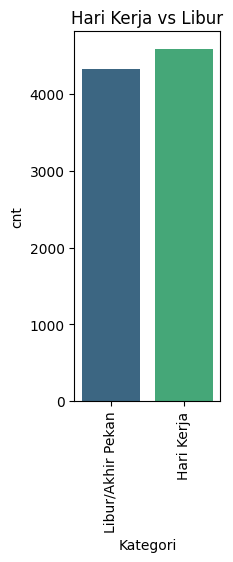

In [18]:
workingday_usage = (
    day_df.groupby('workingday', observed=True)['cnt']
    .mean()
    .reset_index()
)

workingday_usage['Kategori'] = workingday_usage['workingday'].map({0: 'Libur/Akhir Pekan', 1: 'Hari Kerja'})

print("=== Rata-rata Penyewaan Hari Kerja vs Libur ===")
print(workingday_usage[['Kategori', 'cnt']])

plt.subplot(1,3,2)
sns.barplot(x='Kategori', y='cnt', hue='Kategori', data=workingday_usage, palette='viridis', legend=False)
plt.title('Hari Kerja vs Libur')
plt.xticks(rotation=90)

=== Rata-rata Penyewaan Berdasarkan Cuaca ===
                 Kondisi Cuaca          cnt
0       Cerah / Berawan ringan  4876.786177
1              Mendung / Kabut  4035.862348
2  Hujan ringan / Salju ringan  1803.285714


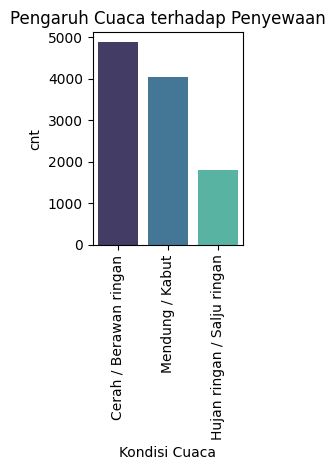

In [19]:
weather_usage = (
    day_df.groupby('weathersit', observed=True)['cnt']
    .mean()
    .reset_index()
    .sort_values(by='cnt', ascending=False)
)

weather_labels = {
    1: 'Cerah / Berawan ringan',
    2: 'Mendung / Kabut',
    3: 'Hujan ringan / Salju ringan',
    4: 'Hujan lebat / Salju lebat'
}
weather_usage['Kondisi Cuaca'] = weather_usage['weathersit'].map(weather_labels)

print("=== Rata-rata Penyewaan Berdasarkan Cuaca ===")
print(weather_usage[['Kondisi Cuaca', 'cnt']])

plt.subplot(1,3,3)
sns.barplot(x='Kondisi Cuaca', y='cnt', hue='Kondisi Cuaca', data=weather_usage, palette='mako', legend=False)
plt.title('Pengaruh Cuaca terhadap Penyewaan')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Conclusion

- Terdapat tren positif dalam penggunaan sepeda dari 2011 ke 2012 yang artinya program bike sharing berhasil menarik lebih banyak pengguna dari tahun ke tahun.
- Pola penyewaan menunjukkan bahwa registered (Terdaftar) mendominasi total peminjaman yang artinya program berlangganan efektif meningkatkan loyalitas pengguna.